# PART 3

In [1]:
import re
import nltk
from string import punctuation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import pandas as pd

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shiva\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Populating the interactive namespace from numpy and matplotlib


In [2]:
raw = pd.read_csv("results_recent_wo_BQ.csv", sep="\t")
raw.drop(['Unnamed: 0'],axis=1,inplace=True)
print (raw.shape)
raw.head(10)

(5050, 3)


,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,Did he buy it at an Audi dealer? Are they tell...
1,"June 11, 2019 12:06AM",henryn,I'm surprised no one else has addressed this. ...
2,"June 11, 2019 12:46AM",roadburner,I loved my 1975.
3,"June 11, 2019 12:55AM",28firefighter,Not really looking to argue with you - he is a...
4,"June 11, 2019 1:20AM",qbrozen,"I agree with what you guys are saying, but, at..."
5,"June 11, 2019 1:31AM",Sandman6472,"So far, our 2015 A3 has been flawless. She own..."
6,"June 11, 2019 2:19AM",28firefighter,Punch for me. But it isn’t a car and doesn’t h...
7,"June 11, 2019 2:32AM",henryn,Not really looking to argue with you - he is a...
8,"June 11, 2019 2:45AM",pensfan83,Looks great @28firefighter
9,"June 11, 2019 2:49AM",28firefighter,Can you make out the second picture in? My fav...


In [3]:
# DATA CLEANSING

def remove_space(s):
    return s.replace("\n"," ")

def removepunc(item):
    for p in punctuation:
        item = item.lstrip().replace(p,'')
    return item

def lowerize(x):
    return x.lower()

stop_words = set(stopwords.words('english'))

def remove_stopwords(s):
    return [w for w in s if not w in stop_words] 

def lematize(l):
    s=[]
    for i in l:
        i=i.lower()
        if i in modeldict:
            s.append(modeldict[i])
        else:
            s.append(wordnet_lemmatizer.lemmatize(i))
    return s


In [4]:
models = pd.read_csv("models.csv")
data = raw.copy()
data = data.dropna()
#data['comments'] = data['comments'].apply(removepunc).apply(lowerize).apply(remove_stopwords)
data['comments'] = data['comments'].apply(remove_space).apply(removepunc).apply(lowerize)
data.head()

,Date,user_id,comments
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...


In [5]:
models = models.set_index("Model")
data_dict = models.to_dict() # converting to dict
modeldict=data_dict["Brand"]

wordnet_lemmatizer = WordNetLemmatizer()

data['comments_word'] = data['comments'].apply(word_tokenize).apply(set).apply(list)

data['comments_replace_model'] = data['comments_word'].apply(lematize).apply(set)

data['comments_final_words'] =  data['comments_replace_model'].apply(remove_stopwords)

data.head()

,Date,user_id,comments,comments_word,comments_replace_model,comments_final_words
0,"June 10, 2019 11:56PM",sda,did he buy it at an audi dealer are they telli...,"[sand, will, are, they, dealer, did, audi, buy...","{sand, will, are, they, dealer, did, audi, buy...","[sand, dealer, audi, buy, care, pound, telling..."
1,"June 11, 2019 12:06AM",henryn,im surprised no one else has addressed this ba...,"[a, im, put, search, not, o2, go, car, bad, th...","{a, im, put, search, not, o2, go, car, bad, th...","[im, put, search, o2, go, car, bad, hand, best..."
2,"June 11, 2019 12:46AM",roadburner,i loved my 1975,"[i, 1975, loved, my]","{i, 1975, loved, my}","[1975, loved]"
3,"June 11, 2019 12:55AM",28firefighter,not really looking to argue with you he is a ...,"[a, not, o2, looking, the, on, don, is, party,...","{a, not, o2, looking, the, on, don, is, party,...","[o2, looking, party, dealer, private, believe,..."
4,"June 11, 2019 1:20AM",qbrozen,i agree with what you guys are saying but at t...,"[you, are, but, same, saying, agree, said, the...","{are, you, but, same, saying, agree, said, the...","[saying, agree, said, time, nuff, audi, guy]"


In [6]:
data.reset_index(inplace  = True)

In [7]:
word_bag = []
for i in range(data.shape[0]):
    word_bag += data['comments_final_words'][i]

#word_bag

word_freq = nltk.FreqDist(word_bag)

In [8]:
rslt = pd.DataFrame(word_freq.most_common(500),              
                    columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,car,1084
1,wa,1078
2,’,1050
3,like,962
4,one,891


In [10]:
model_list = list(models["Brand"].drop_duplicates())
top_10_brands = rslt[rslt["Word"].isin(model_list)].reset_index(drop='True')[:10]
top_10_brands

,Word,Frequency
0,audi,236
1,volkswagen,226
2,honda,225
3,subaru,187
4,acura,175
5,toyota,173
6,chevrolet,166
7,volvo,163
8,bmw,140
9,hyundai,137


In [11]:
def check_co_occ(brand_A,brand_B,post):
    if(brand_A in post and brand_B in post):
        return 1;
    else:
        return 0;



In [12]:
comments = data['comments_final_words']


co_exist_num = {}
#model_list = list(models["Brand"].drop_duplicates())
model_list = list(top_10_brands['Word'])
for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B] = 0



In [13]:
for comment in comments:
    for brand_A in model_list:
        for brand_B in model_list:
            co_exist_num[brand_A+","+brand_B]+=check_co_occ(brand_A,brand_B,comment)
        

In [14]:
mat = pd.DataFrame.from_dict(co_exist_num, orient = 'index').values.reshape(10,10)
df = pd.DataFrame(mat).set_index(pd.Series(top_10_brands['Word']))
df.columns = top_10_brands['Word']
df

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,236,42,25,12,18,7,11,20,11,11
volkswagen,42,226,28,19,15,13,15,11,9,23
honda,25,28,225,18,29,28,11,16,11,15
subaru,12,19,18,187,16,11,3,16,12,9
acura,18,15,29,16,175,10,4,28,12,10
toyota,7,13,28,11,10,173,15,5,6,14
chevrolet,11,15,11,3,4,15,166,5,4,9
volvo,20,11,16,16,28,5,5,163,9,12
bmw,11,9,11,12,12,6,4,9,140,5


In [15]:
N=len(comments)
lift=df

for i in range(10):
    for j in range(10):
        lift.iloc[i,j]=N*df.iloc[i,j]/(top_10_brands['Frequency'].iloc[i]*top_10_brands['Frequency'].iloc[j])
lift

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,21.300847,3.958565,2.366761,1.366899,2.190944,0.861884,1.411502,2.613601,1.673638,1.710287
volkswagen,3.958565,22.243363,2.768063,2.260021,1.906574,1.671467,2.009942,1.501086,1.429930,3.734287
honda,2.366761,2.768063,22.342222,2.150588,3.702425,3.616082,1.480509,2.193102,1.755460,2.446229
subaru,1.366899,2.260021,2.150588,26.882353,2.457815,1.709283,0.485826,2.638759,2.304202,1.765994
acura,2.190944,1.906574,3.702425,2.457815,28.725714,1.660446,0.692186,4.934479,2.462204,2.096767
toyota,0.861884,1.671467,3.616082,1.709283,1.660446,29.057803,2.625705,0.891344,1.245334,2.969411
chevrolet,1.411502,2.009942,1.480509,0.485826,0.692186,2.625705,30.283133,0.928930,0.865232,1.989403
volvo,2.613601,1.501086,2.193102,2.638759,4.934479,0.891344,0.928930,30.840491,1.982603,2.701357
bmw,1.673638,1.429930,1.755460,2.304202,2.462204,1.245334,0.865232,1.982603,35.907143,1.310480


In [16]:
lift_diss=1/lift

for i in range(10):
    lift_diss.iloc[i,i]=0
lift_diss

Word,audi,volkswagen,honda,subaru,acura,toyota,chevrolet,volvo,bmw,hyundai
Word,,,,,,,,,,
audi,0.000000,0.252617,0.422518,0.731583,0.456424,1.160249,0.708465,0.382614,0.597501,0.584697
volkswagen,0.252617,0.000000,0.361263,0.442474,0.524501,0.598277,0.497527,0.666184,0.699335,0.267789
honda,0.422518,0.361263,0.000000,0.464989,0.270093,0.276542,0.675444,0.455975,0.569651,0.408793
subaru,0.731583,0.442474,0.464989,0.000000,0.406865,0.585041,2.058352,0.378966,0.433990,0.566253
acura,0.456424,0.524501,0.270093,0.406865,0.000000,0.602248,1.444699,0.202656,0.406140,0.476925
toyota,1.160249,0.598277,0.276542,0.585041,0.602248,0.000000,0.380850,1.121902,0.802997,0.336767
chevrolet,0.708465,0.497527,0.675444,2.058352,1.444699,0.380850,0.000000,1.076507,1.155759,0.502663
volvo,0.382614,0.666184,0.455975,0.378966,0.202656,1.121902,1.076507,0.000000,0.504387,0.370184
bmw,0.597501,0.699335,0.569651,0.433990,0.406140,0.802997,1.155759,0.504387,0.000000,0.763079


In [17]:
mat_lift=lift_diss.values
from sklearn import manifold
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import sklearn

MDS_cars = sklearn.manifold.MDS(n_components=2, metric=True, dissimilarity='precomputed')


dissimilarity = lift_diss
npos = MDS_cars.fit_transform(dissimilarity)

seed = np.random.RandomState(seed=99)
mds = manifold.MDS(n_components=2, max_iter=20000, random_state=seed,
                   dissimilarity="precomputed", n_jobs=1)
x_mds= mds.fit(dissimilarity.astype(np.float32)).embedding_


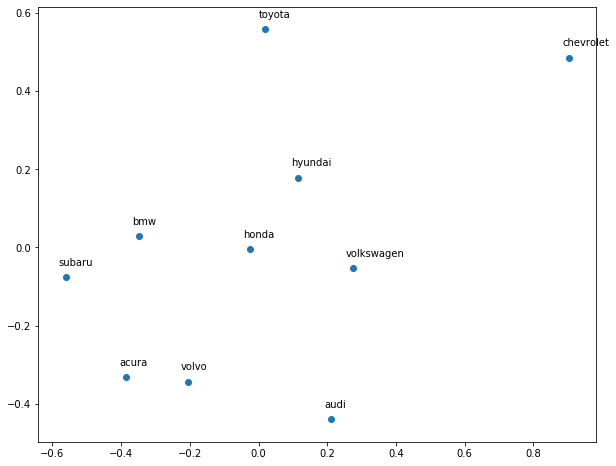

In [25]:
fig = plt.figure(figsize=(10, 8))
x=x_mds[:,0]
y=x_mds[:,1]

label=lift.columns.values
plt.scatter(x, y)
for i in range(10):
    plt.text(x[i]-0.02,y[i]+0.03,label[i])
plt.show()

### Part B

What insights can you offer brand managers from your analysis in Task A (choose two brands that you can offer the most interesting/useful insights for)? 

INSIGHTS:

The data is scraped from a car forum where the buyers are frequent buyers of cars. The assumption behind the following insights is that these buyers are comparing two brands in each post as part of their buying/switching decision.

##### BRAND 1: 
> Chevrolet

Chevrolet brand is pretty isolated on the MDS graph showing dissimilarity from all other brands. What this means for chevrolet as a brand is that it is not talked in association with other brands on a relative comparison to how other brands are talked about. This could mean as a positive sign of it not getting compared to other brands reflecting a loyal talking audience. However, it also goes to show that people interested in talking about other car brands do not involve chevrolet in their discussions as much. It can be inferred that people show low switching behaviour from chevrolet to other brands and vice-versa.

##### BRAND 2:
>Volvo

Volvo is very close to Acura on the MDS graph showing association in the discussion forum. What this means for the brand of Volvo is that it is constantly talked and/or compared with Acura. The brand manager should treat Acura's brand as a comparison parameter for its customers(or potential customers). It can be inferred that people when making a comment or taking a buying decision often compare Acura with Volvo more often than they do with other brands.

### Part C

#### First, define what words denote an attribute and map to brands

In [19]:
#Attributes are not defined - need to download words to create a dictionary of attribute terms.
words=[]
for i in data['comments_final_words']:
    words.append(i)

import itertools
merged_list = list(itertools.chain.from_iterable(words))

from collections import Counter
counts = Counter(merged_list)

#output words to be assessed
output = pd.DataFrame.from_dict(data=counts, orient='index')
#output.to_csv("attribute_singleword_frequency", sep='\t')

In [20]:
#import words tagged with attribute - 1,000+ words manually assessed to find top 5 attribute categories
attributes = pd.read_csv("attribute_lookup.csv", sep=',')

#show top 5 most frequently mentioned attributes
attributes.groupby(["Attribute"]).sum().sort_values(by=["Count"], ascending=False)

,Count
Attribute,
Interior,569
Performance,368
Engine,291
Body Style,277
Transmission,215


In [21]:
#Display words associated with attribute
attributes.groupby(["Attribute", "Word"]).sum().sort_values(by=["Attribute", "Count"], ascending=True)

Count
Attribute    Word               
Body Style   2seater           3
             coupe            21
             pickup           38
             sedan            51
             wagon            71
             suv              93
Engine       diesel           15
             v8               17
             cylinder         22
             hybrid           30
             v6               69
             engine          138
Interior     seatbelt          6
             backseat         14
             floor            27
             leather          52
             trim             52
             interior        196
             seat            222
Performance  zippy             4
             torque           28
             performance      44
             hp               47
             turbo            58
             speed            73
             power           114
Transmission automatic        34
             auto             43
             transmission     68
             manual           70

In [22]:
#define function to check brand mention and attribute key word mention in a post
def check_brand_att(att, brand, text):
    if(att in text and brand in text):
        return 1
    else:
        return 0

In [23]:
#create dictionary with counts of brand and attribute key word
brand_att_id = {}
attribute_id_list = list(attributes["Word"])
top_5_brands = list(top_10_brands["Word"][:5])
comments = data['comments_final_words']

for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_id[att+","+brand] = 0
            
for comment in comments:
    for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_id[att+","+brand] += check_brand_att(att, brand, comment)

In [24]:
#Create dataframe attribute key words vs brand counts
df_mat = pd.DataFrame.from_dict(brand_att_id, orient = 'index').values.reshape(len(attribute_id_list),5)
df_attributes = pd.DataFrame(df_mat).set_index(pd.Series(attribute_id_list))
df_attributes.columns = list(top_5_brands)
df_attributes.head()

,audi,volkswagen,honda,subaru,acura
seat,12,23,16,18,14
interior,23,30,17,12,16
engine,9,11,9,21,15
power,10,4,7,8,8
suv,5,6,5,4,3


#### Calculate lifts for long list of attribute keywords, delete any with low lift scores

In [25]:
#See long list of lifts to check whether to throw out key words
N=len(comments)
lift_att = df_attributes.copy()
top_5_brands = top_10_brands.iloc[:5]

for i in range(len(df_attributes)):
    for j in range(5):
        numerator = N*df_attributes.iloc[i,j]
        denominator = (top_10_brands['Frequency'].iloc[j] * attributes["Count"].iloc[i])
        lift_att.iloc[i,j] = numerator/denominator
lift_att

,audi,volkswagen,honda,subaru,acura
seat,1.151397,2.304493,1.610250,2.179650,1.811532
interior,2.499589,3.404596,1.937846,1.645858,2.344956
engine,1.389186,1.773022,1.457101,4.090793,3.122360
power,1.868495,0.780469,1.371891,1.886481,2.015840
suv,1.145207,1.435056,1.201195,1.156230,0.926636
speed,2.042547,1.828222,1.836347,1.473006,1.180509
wagon,1.800072,1.879721,1.258717,4.922121,3.641288
manual,0.912893,1.906574,1.915048,0.384034,3.282939
v6,1.234832,0.322368,3.561804,1.558397,4.579462
transmission,4.072221,2.289758,1.642810,0.790657,2.534622


In [26]:
#drop zippy and 2seater
mask = ((attributes["Word"] == "zippy") | (attributes["Word"] == "2seater"))
attributes = attributes[-mask]

#### Now go through all comments, replace attribute keyword with its attribute class and remove duplicates in each post

In [27]:
#function to replace keywords with attribute class
def att_class(x):
    for key, value in enumerate(x): 
        if value in attributes["Word"].values:
            mask = attributes["Word"]==value
            x[key] = str(attributes[mask]["Attribute"].values[0])
    return x

#function to just count att class
def check_att_class(att, text):
    if(att in text):
        return 1
    else:
        return 0

In [28]:
data['comments_final_words_atts'] =  data['comments_final_words'].apply(att_class)
data['comments_final_words_atts'] = data['comments_final_words_atts'].apply(set).apply(list)
comments_new = data['comments_final_words_atts']

In [29]:
brand_att_key_only = {}
attribute_id_list = list(set(attributes["Attribute"]))

for att in attribute_id_list:
        brand_att_key_only[att] = 0

for comment in comments_new:
    for att in attribute_id_list:
        brand_att_key_only[att] += check_att_class(att, comment)
brand_att_key_only = pd.DataFrame(list(brand_att_key_only.items()), columns=['Att', 'Count'])
brand_att_key_only

,Att,Count
0,Transmission,152
1,Performance,240
2,Engine,204
3,Interior,359
4,Body Style,174


In [30]:
#count occurences of brand and attribute class
brand_att_key = {}
attribute_id_list = list(set(attributes["Attribute"]))
top_5_brands = top_10_brands["Word"].iloc[:5]

for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_key[att+","+brand] = 0

for comment in comments_new:
    for att in attribute_id_list:
        for brand in top_5_brands:
            brand_att_key[att+","+brand] += check_brand_att(att, brand, comment)

In [31]:
#Create dataframe attribute key words vs brand counts
df_mat = pd.DataFrame.from_dict(brand_att_key, orient = 'index').values.reshape(len(attribute_id_list),5)
df_attributes = pd.DataFrame(df_mat).set_index(pd.Series(attribute_id_list))
df_attributes.columns = list(top_5_brands)
df_attributes

,audi,volkswagen,honda,subaru,acura
Transmission,16,18,17,11,16
Performance,21,20,22,20,21
Engine,18,19,23,27,26
Interior,35,46,32,26,32
Body Style,13,14,18,17,17


In [32]:
N=len(comments_new)
lift_att = df_attributes.copy()
top_5_brands = top_10_brands.iloc[:5]
att_class_counts = brand_att_key_only["Count"]

for i in range(len(att_class_counts)):
    for j in range(5):
        numerator = N*df_attributes.iloc[i,j]
        denominator = (top_5_brands['Frequency'].iloc[j] * att_class_counts.iloc[i])
        lift_att.iloc[i,j] = numerator/denominator
lift_att

,audi,volkswagen,honda,subaru,acura
Transmission,2.242194,2.634082,2.498801,1.945433,3.023759
Performance,1.863824,1.853614,2.048037,2.240196,2.513500
Engine,1.879487,2.071686,2.518976,3.557958,3.661120
Interior,2.076684,2.850124,1.991507,1.946911,2.560509
Body Style,1.591443,1.789696,2.311264,2.626437,2.806535


# Task D

#### Advice to Product Manager

Body Style:
The lift between Body Style (e.g. sedan, suv, coupe) and brands shows which body styles are associated with each brand. In particular it provides insight into which style resonates most with customers from a product line that may include multiple body styles. For example, Subaru and wagon have a lift of over 5 from posts such as: 

"And as you say Subaru is like a more affordable version of a Volvo. Even ten years ago Subaru interiors were less than ideal but the 2020 Outback in the upper trims looks very good to me. I think even the top-of-the-line Outback with the turbo engine is less than the base model Volvo wagon"

The Outback product line is mentioned frequently when discussions about wagon occur. These insights are shown in detail in the longer lift table in Task C and can help with decisions about future product lines, where resources should be focused in development and how to price different body styles.  

Transmission:
Transmission (e.g. automatic or manual) is associated with Audi, Honda and is highest for Volkswagen. The lifts for each brand can help inform whether manual and automatic options are important to customers. For example, Volkswagen has very high lift in relation to automatic but relatively low lift for manual. For Volkswagen it may make sense to only/ primarily offer automatic options.

Interior: 
The interior of cars were mentioned frequently and often mentioned distinct features. For what would be relatively low-cost additions (e.g. a distinct gear knob) and simple engineering, changes to interiors to make product lines distinctive could capture new customers and also a deep dive into the data could help identify what interior elements should be kept in future models.

Engine:
Engine has a broad range of lifts for each brand and is very high for Subaru. Reading some posts there appears to be strong positive and negative sentiment about many cars. For example, Subaru has negative mentions about issues with wear-and-tear and resale value. Being aware of these issues could help improve future product lines.

Performance:
Performance is associated with only some brands and is very low for Chevrolet. These scores, and the detailed scores beneath them, provide further direction for where product managers should focus their resources. For Chevrolet, it appears people don't care so much about performance and instead are mostly interested in the engine itself. Conversely, for Honda and Subaru it is a relatively important attribute and worth continued focus and investment.

#### Advice to Marketing/ Advertising Manager

Body Style:
Different body styles are frequently mentioned when discussing brands. The lifts of different styles vs brands provides a data point to understand market awareness of different product lines/ body styles for a brand. If there is high association between a certain style and a brand, marketing could direct resources to cementing the brand as a leader of that body style (e.g. Subaru as a leader for wagons). Alternativley, it can identify where customers are not aware of body styles for brands, where more advertising and marketing can help improve awareness and make customers consider the brand in future purchasing decisions when a shopping for an SUV, sedan or other body style.

Transmission:
Transmission is a frequently discussed attribute in car forums and can be inferred as important for customers. Including a description of the car's transmission in marketing material and messaging could help provide the information desired by customers when making their purchasing decision.

Interior:
Interior has lifts of 1.7 - 2.6 for all brands and mostly comprises mentions of the words interior and seat. It appears that people strongly associate a car with specific features of the interior, for example in discussing the Volkswagen GTI a user mentioned "the GTI two distinct but simple textile elements: a tartan seat pattern and a golf ball-style gear knob". Interior elements can make cars distinctive and should therefore be highlighted in ads and marketing materials

Engine:
Posts about engines include many positive and negative posts. Being aware of the perception of this attribute can help reshape the conversation and either improve negative sentiment or grow positive sentiment. 

Performance:
Interestingly performance isn't the highest lift score for any brand. While important for most, it may not warrant the attention that many marketing and advertising campaigns provide it. It should be considered as an equal or lesser attribute to promote in parallel with other attributes.